# Mathematics and Python
## Week 2
### Задача 1: сравнение предложений

In [71]:
import numpy as np
import pandas as pd

import re

from scipy.spatial import distance
from scipy import linalg

%matplotlib inline
import pylab as plt

Скачайте файл с предложениями (sentences.txt).

In [45]:
with open('sentences.txt', 'r') as txt:
    text_full = txt.readlines()

In [46]:
text_full[0]

'In comparison to dogs, cats have not undergone major changes during the domestication process.\n'

Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().

In [47]:
text = text_full[:]
for i, s in enumerate(text_full):
    text[i] = s.lower()

In [48]:
print (text[0])

in comparison to dogs, cats have not undergone major changes during the domestication process.



Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.

In [49]:
for i, s in enumerate(text):
    text[i] = re.split('[^a-z]', s)
    text[i] = [s for s in text[i] if len(s) !=0]

In [50]:
print (text[0])

['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication', 'process']


Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.

In [51]:
text_dict = {}
for line in text:
    for word in line:
        if word in text_dict.values():
            continue
        else:
            text_dict[len(text_dict)] = word

In [52]:
text_dict

{0: 'in',
 1: 'comparison',
 2: 'to',
 3: 'dogs',
 4: 'cats',
 5: 'have',
 6: 'not',
 7: 'undergone',
 8: 'major',
 9: 'changes',
 10: 'during',
 11: 'the',
 12: 'domestication',
 13: 'process',
 14: 'as',
 15: 'cat',
 16: 'simply',
 17: 'catenates',
 18: 'streams',
 19: 'of',
 20: 'bytes',
 21: 'it',
 22: 'can',
 23: 'be',
 24: 'also',
 25: 'used',
 26: 'concatenate',
 27: 'binary',
 28: 'files',
 29: 'where',
 30: 'will',
 31: 'just',
 32: 'sequence',
 33: 'a',
 34: 'common',
 35: 'interactive',
 36: 'use',
 37: 'for',
 38: 'single',
 39: 'file',
 40: 'is',
 41: 'output',
 42: 'content',
 43: 'standard',
 44: 'hear',
 45: 'sounds',
 46: 'too',
 47: 'faint',
 48: 'or',
 49: 'high',
 50: 'frequency',
 51: 'human',
 52: 'ears',
 53: 'such',
 54: 'those',
 55: 'made',
 56: 'by',
 57: 'mice',
 58: 'and',
 59: 'other',
 60: 'small',
 61: 'animals',
 62: 'one',
 63: 'people',
 64: 'deliberately',
 65: 'tamed',
 66: 'artificial',
 67: 'selection',
 68: 'they',
 69: 'were',
 70: 'useful',
 71

Создайте матрицу размера n \* d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 \* 254.

In [53]:
matrix = np.ones((len(text), len(text_dict)))

In [54]:
for i in range(len(text)):
    for j in range(len(text_dict)):
        matrix[i, j] = text[i].count(text_dict[j])

In [55]:
matrix.shape

(22, 254)

Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine.

In [56]:
similarity = []
for i in range(len(matrix)):
    dist = distance.cosine(matrix[0, :], matrix[i, :])
    similarity = np.append(similarity, dist)

Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.

In [57]:
idx = similarity.argsort()[1:3]

Запишите полученные числа в файл, разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-1.txt).

In [58]:
with open('submission-1.txt', 'w') as file_obj:
    file_obj.write('{} {}'.format(idx[0], idx[1]))

In [59]:
!cat submission-1.txt

6 4

Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

In [60]:
print([text_full[i] for i in idx])

['Domestic cats are similar in size to the other members of the genus Felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).\n', 'In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.\n']


### Задача 2: аппроксимация функции

In [61]:
def f(x):
    return np.sin(x / 5.) * np.exp(x / 10.) + 5. * np.exp(-x / 2.)

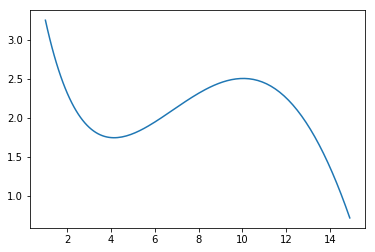

In [68]:
x = np.arange(1, 15, 0.1)
y = f(x)
plt.plot(x, y)
plt.show()

Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

In [69]:
A = np.array([[1., 1.],
              [1., 15.]])
b = np.array([f(1.), f(15.)])

In [70]:
print(b)

[ 3.25221687  0.63522142]


In [72]:
pol = linalg.solve(A, b)

In [73]:
pol

array([ 3.43914511, -0.18692825])

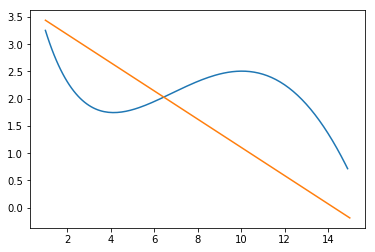

In [75]:
plt.plot(x, y)
plt.plot([1, 15], pol)
plt.show()

Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

In [76]:
A = np.array([[1., 1., 1.], 
              [1., 8., 8.**2],
              [1., 15., 15.**2]])
b = np.array([f(1.), f(8.), f(15.)])

In [79]:
pol2 = linalg.solve(A, b)

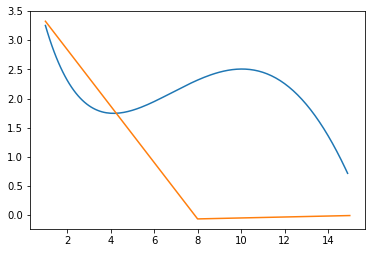

In [80]:
plt.plot(x, y)
plt.plot([1, 8, 15], pol2)
plt.show()

Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? 

In [82]:
A = np.array([[1., 1., 1., 1.],
              [1., 4., 4.**2, 4.**3],
              [1., 10., 10.**2, 10.**3],
              [1., 15., 15.**2, 15.**3]])
b = np.array([f(1.), f(4.), f(10.), f(15.)])

In [83]:
pol3 = linalg.solve(A, b)

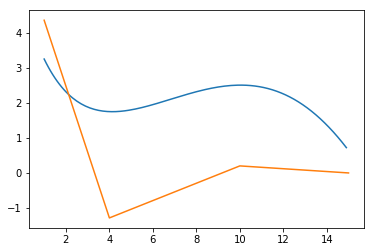

In [84]:
plt.plot(x, y)
plt.plot([1, 4, 10, 15], pol3)
plt.show()

In [85]:
pol3

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу.<br>
Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. 

In [86]:
with open('submission-2.txt', 'w') as file_obj:
    file_obj.write('{} {} {} {}'.format(pol3[0], pol3[1], pol3[2], pol3[3]))

In [87]:
!cat submission-2.txt

4.362641535118072 -1.295525865694844 0.19333684702151172 -0.008235651173320558